# Test Dataset
test dataset is corresponding with the test case as in the reference

`pyvol` can provide fast and efficient local volatility surface corresponding to the market prices.

In [16]:
strikes = [355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0, 387.5, 390.0]
dt = 1/365.0
ttms = [6 * dt, 34 * dt, 62 * dt]
initial_price = 356.01
r = 0.0151
market_prices = [3.61, 2.20, 1.22, 0.62, 0.25, 0.11, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                7.52, 6.09, 4.85, 3.82, 2.95, 2.18, 1.60, 1.14, 0.79, 0.54, 0.39, 0.27, 0.21, 0.15, 0.12,
                10.00, 8.55, 7.04, 6.35, 5.29, 4.37, 3.32, 2.68, 2.30, 1.74, 1.47, 1.16, 0.91, 0.72, 0.55]

from pyvol import LocalVolatilitySurface, OptionType, Interpolator 
span = 3
interval = 100
surface= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol= surface.LocalVol()
numerical_value = surface.VanillaFD(vol.T)

## Data Visualization

### Numerical Values vs Market Data

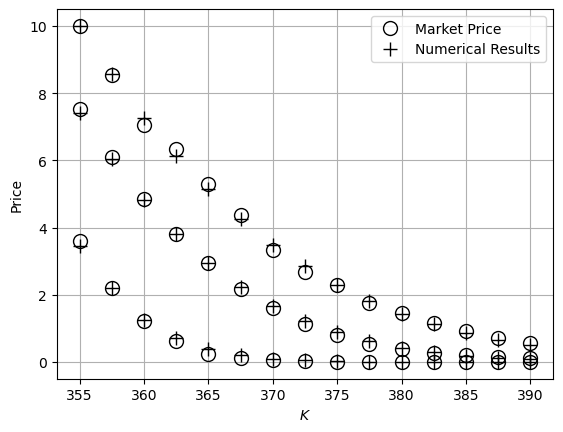

In [8]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Local Volatility Interpolator

In [13]:
x, y = np.meshgrid(surface.GetPrices(), surface.GetTimes())
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, surface.GetVolSurf().T, cmap = 'viridis')
ax.set_xlabel("$S$")
ax.set_ylabel('$t$')
ax.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax)
ax.set_zlim([0, 1.0])
ax.view_init(azim =-75, elev=15)
plt.show()

(63, 301) (63, 301) (301, 63)


## Real Market Data

In [5]:
strikes = [310.0, 312.5, 315.0, 317.5, 320.0]
dt = 1/365.0
ttms = [30 * dt, 58 * dt, 86 * dt]
initial_price = 301.53
r = 0.0149
market_prices = [1.43, 0.93, 0.59, 0.35, 0.20, 2.99, 2.29, 
                 1.66, 1.22, 0.89, 4.28, 3.51, 2.79, 2.13, 1.84]

span = 3
interval = 100
from pyvol import LocalVolatilitySurface, OptionType, Interpolator
surface2= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol2= surface2.LocalVol()
numerical_value2 = surface2.VanillaFD(vol2)

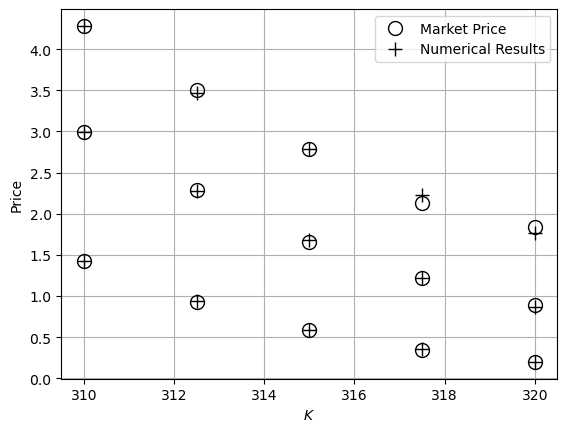

In [27]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value2, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

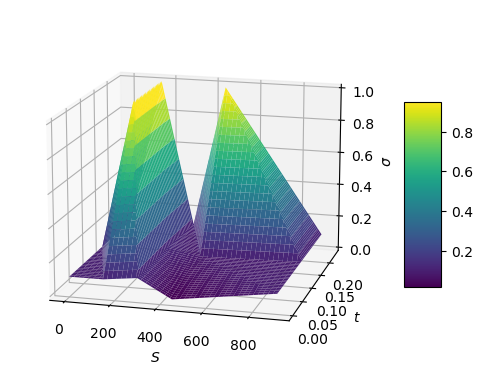

In [28]:
x, y = np.meshgrid(surface2.GetPrices(), surface2.GetTimes())
fig = plt.figure() 
ax2  = fig.add_subplot(111, projection = '3d')
surf = ax2.plot_surface(x, y, surface2.GetVolSurf().T, cmap = 'viridis')
ax2.set_xlabel("$S$")
ax2.set_ylabel('$t$')
ax2.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax2)
ax2.set_zlim([0, 1.0])
ax2.view_init(azim =-75, elev=15)
plt.show()